In [ ]:
import zipfile

# Replace 'yourfile.zip' with the actual name of your zip file
zip_file = 'archive.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Extract to /content directory or specify another path

print("File unzipped successfully!")


File unzipped successfully!


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths =[]
labels = []

In [ ]:
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')
len(paths)

Dataset is loaded


2800

In [ ]:
paths[:5]
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()
df['label'].value_counts()

,count
label,
fear,400
ps,400
disgust,400
sad,400
angry,400
happy,400
neutral,400


In [ ]:
df['label_count']= df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

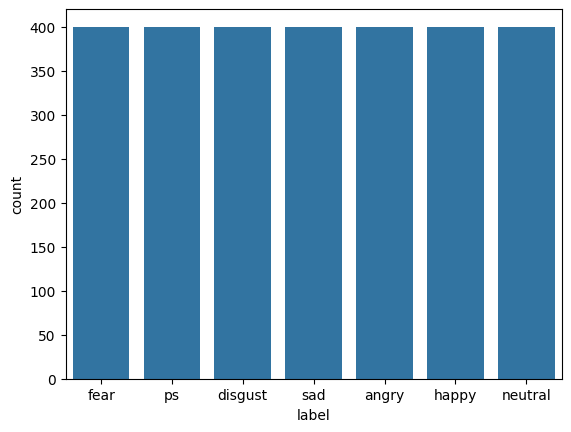

In [ ]:
df.drop('label_count', axis = 1)

df.info()

sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [ ]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_tire_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_kill_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_fail_fear.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_long_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_burn_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_mood_ps.wav'],
      dtype=object)

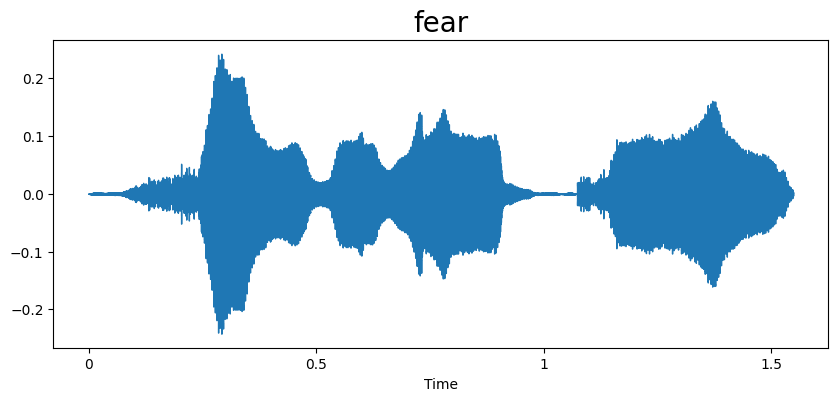

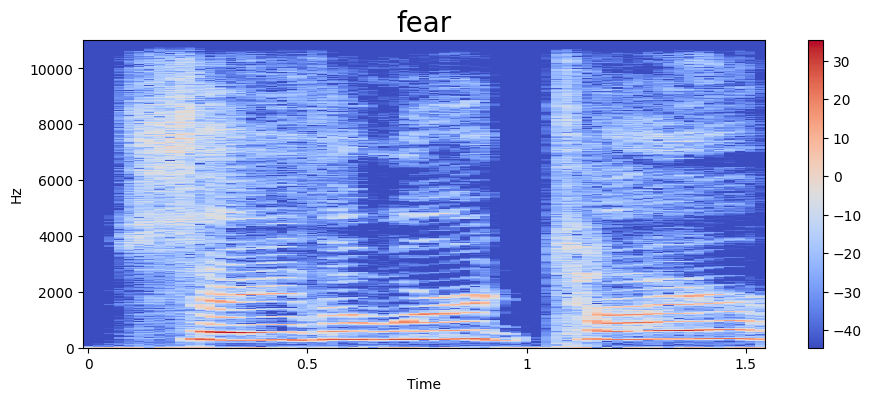

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

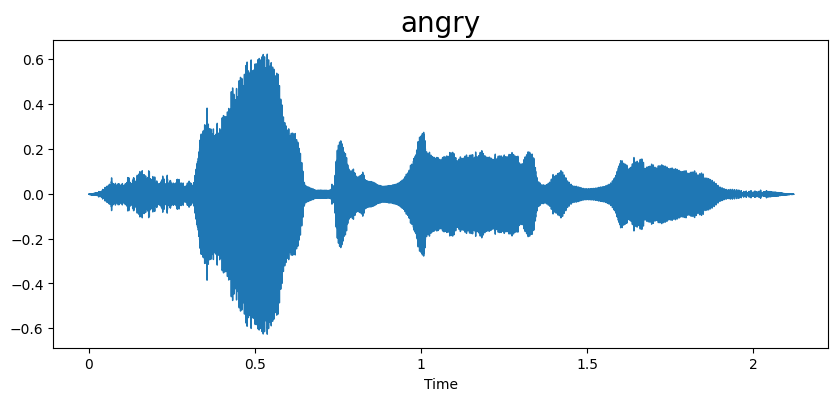

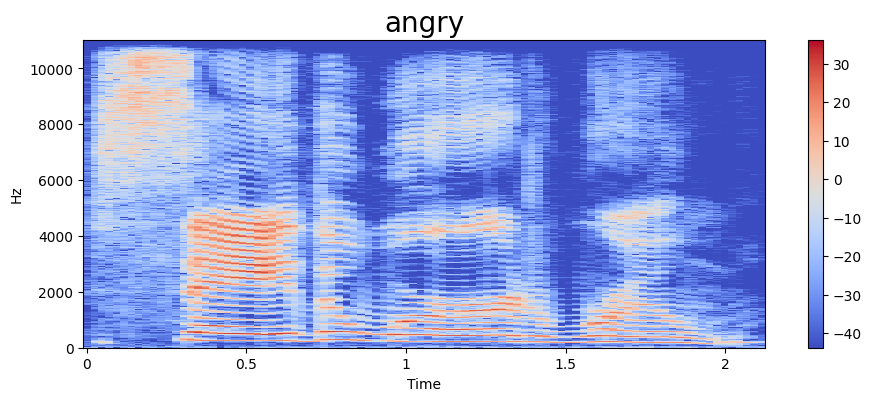

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

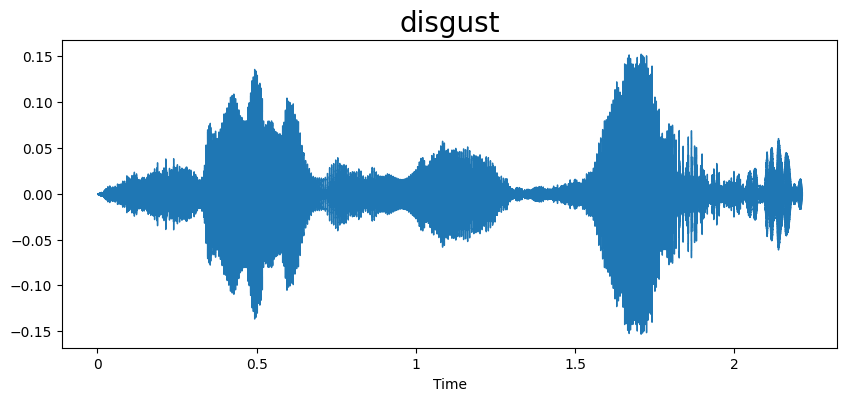

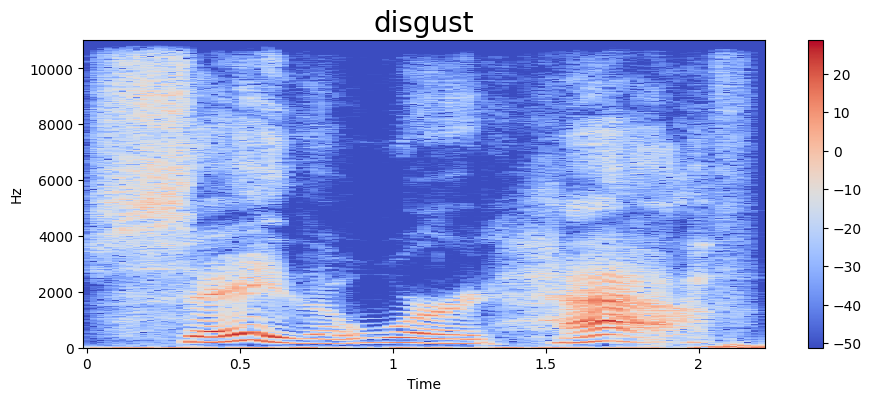

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

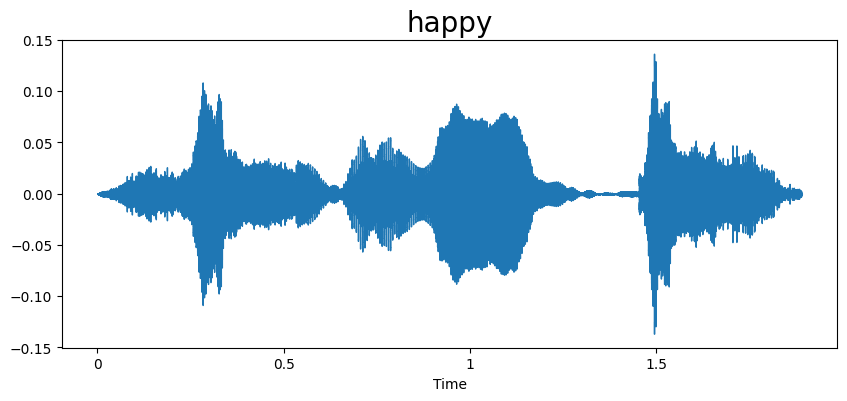

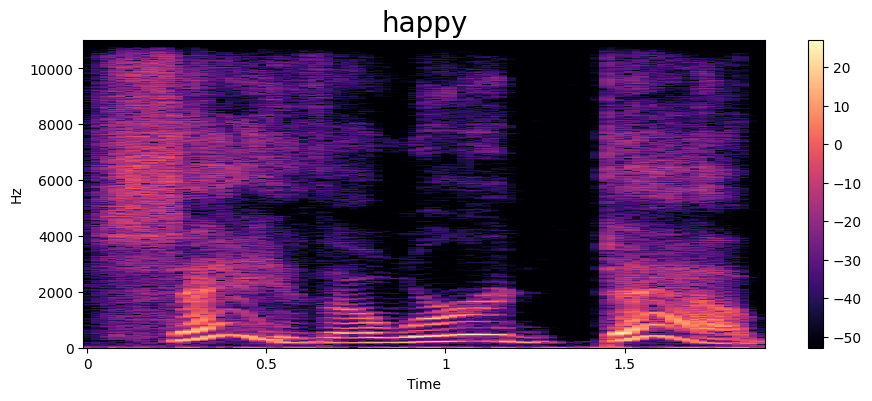

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.8848471e+02,  8.5043114e+01,  8.6716884e-01, -2.7837967e+01,
       -8.8677063e+00,  7.1472979e+00, -1.5750627e+01, -1.0009196e+01,
       -1.2533851e+01,  5.6503808e-01, -1.9401281e+01, -3.8784392e+00,
       -1.0701877e+01,  3.7973902e+00, -8.9457760e+00, -1.0899619e+00,
       -8.1259489e+00, -3.9357331e+00,  1.3164380e+00, -1.0090244e+01,
        9.4915638e+00,  3.0260523e+01,  2.6965569e+01,  3.6117321e+01,
        2.2489786e+01,  9.4233255e+00, -2.0324097e+00,  2.3527331e+00,
        2.5738335e-01,  1.4802642e+01, -3.6794357e+00, -5.7372746e+00,
       -2.2228878e+00, -3.9400878e+00,  3.9678237e+00,  1.9880340e+00,
       -7.3334265e+00, -4.9012036e+00, -2.7675805e+00, -1.4861958e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

,speech
0,"[-388.4847, 85.04311, 0.86716884, -27.837967, ..."
1,"[-433.5874, 69.54548, 7.016116, -5.76443, -7.2..."
2,"[-415.04907, 68.051796, 13.262637, -21.191761,..."
3,"[-452.84827, 99.645905, 10.672774, -24.341555,..."
4,"[-428.92374, 76.920586, 11.845303, -42.79665, ..."
...,...
2795,"[-341.70773, 86.204254, -1.6080027, -6.48541, ..."
2796,"[-359.0418, 28.117107, -11.621959, 17.04148, -..."
2797,"[-357.39175, 91.917496, -11.566878, -4.3486533..."
2798,"[-377.3896, 81.54513, -25.676172, -17.622133, ..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

y = y.toarray()

y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Now you can access the training history
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.2849 - loss: 1.7574 - val_accuracy: 0.6875 - val_loss: 0.8674
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.6509 - loss: 0.9114 - val_accuracy: 0.8036 - val_loss: 0.4634
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8033 - loss: 0.5693 - val_accuracy: 0.8929 - val_loss: 0.3381
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.8673 - loss: 0.4369 - val_accuracy: 0.9411 - val_loss: 0.1908
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9015 - loss: 0.3262 - val_accuracy: 0.9571 - val_loss: 0.1232
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.9137 - loss: 0.2813 - val_accuracy: 0.9679 - val_loss: 0.0936
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.9306 - loss: 0.2579 - val_accuracy: 0.9661 - val_loss: 0.1291
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.9253 - loss: 0.2465 - val_accurac

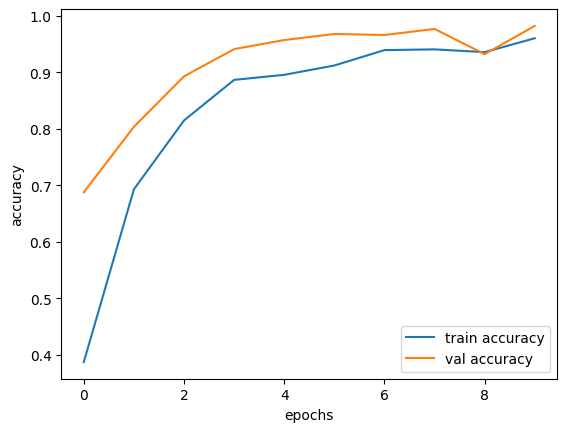

In [ ]:
# Now you can access the training history
epochs = list(range(10)) # Change to 10 to match the number of training epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
loss = history.history['loss']
val_loss = history.history['val_loss']

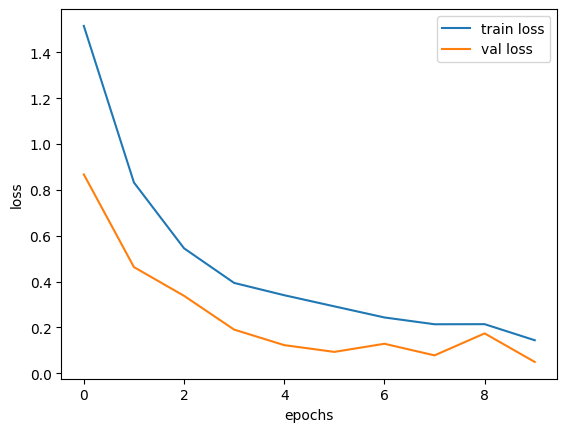

In [ ]:
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)
from sklearn.metrics import confusion_matrix, classification_report
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Confusion Matrix:
[[75  0  1  0  0  0  1]
 [ 1 96  0  0  0  1  1]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 79  0  0  0]
 [ 0  0  0  0 80  0  0]
 [ 2  1  0  1  0 68  0]
 [ 0  1  0  0  0  0 85]]
Classification Report:
              precision    recall  f1-score   support

       angry       0.96      0.97      0.97        77
     disgust       0.98      0.97      0.97        99
        fear       0.99      1.00      0.99        67
       happy       0.99      1.00      0.99        79
     neutral       1.00      1.00      1.00        80
          ps       0.99      0.94      0.96        72
         sad       0.98      0.99      0.98        86

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



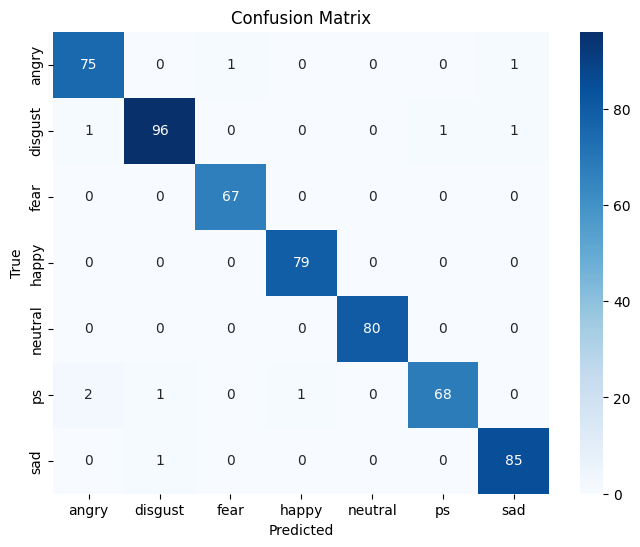

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()